In [1]:
import heartpy as hp
import matplotlib.pyplot as plt
import pandas as pd

print(pd.__version__)

2.0.0


In [2]:
df = pd.read_csv("device_test/ppg-data.csv", skiprows=1)

In [3]:
df["ts(msec)"] = pd.to_datetime(df["ts(msec)"], unit="ms")

In [4]:
(df["ts(msec)"].diff().dt.microseconds).describe()

count    6.816008e+06
mean     2.055762e+04
std      2.421996e+02
min      2.041800e+04
25%      2.049300e+04
50%      2.053500e+04
75%      2.058200e+04
max      4.555240e+05
Name: ts(msec), dtype: float64

In [5]:
freq = 100_0000 / (df["ts(msec)"].diff().dt.microseconds).mean()
freq

48.64377350256498

In [6]:
df.set_index("ts(msec)", inplace=True)
df

,PPG
ts(msec),
2023-02-24 14:00:00.007380480,44976
2023-02-24 14:00:00.027909120,45508
2023-02-24 14:00:00.048438016,45982
2023-02-24 14:00:00.068966656,46317
2023-02-24 14:00:00.089495296,46476
...,...
2023-02-26 07:03:30.014213632,12904
2023-02-26 07:03:30.034770688,12904
2023-02-26 07:03:30.055328000,12904


<Axes: xlabel='ts(msec)'>

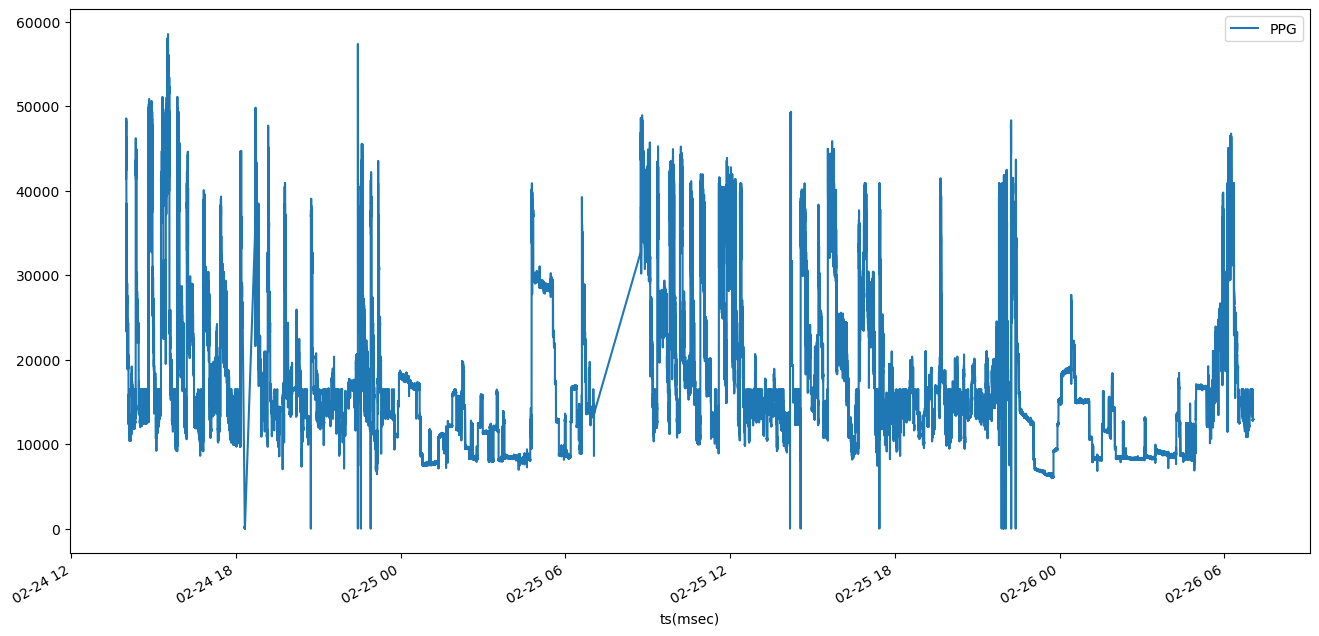

In [7]:
pd.options.plotting.backend = "matplotlib"

df.plot(figsize=(16, 8))

<Axes: xlabel='ts(msec)'>

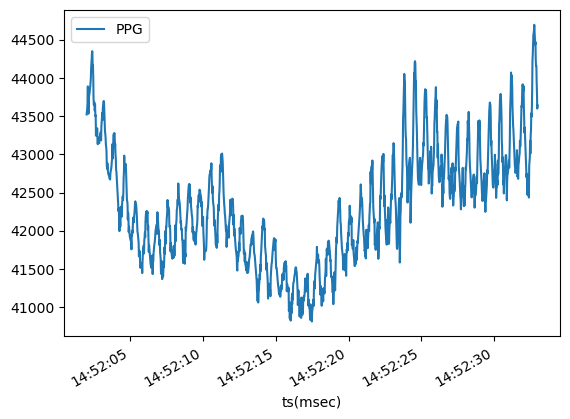

In [8]:
pd.options.plotting.backend = "matplotlib"
df.loc["2023-02-24 14:52:02":"2023-02-24 14:52:32"].plot()

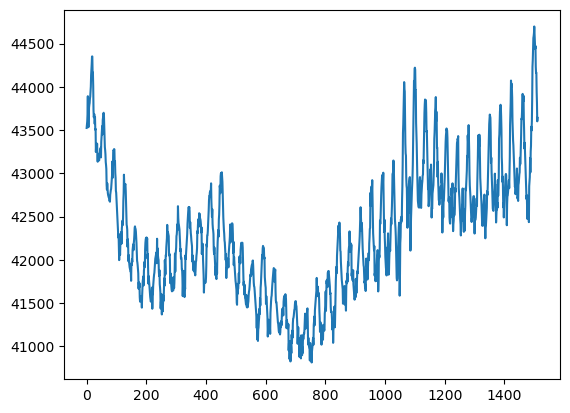

In [9]:
data = df.loc["2023-02-24 14:52:02":"2023-02-24 14:52:32"]["PPG"].to_numpy()

plt.plot(data)

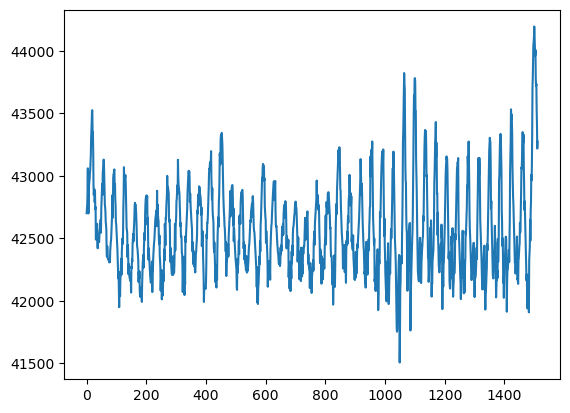

In [10]:
data = hp.filter_signal(data, cutoff=0.001, sample_rate=freq, filtertype="notch")
plt.plot(data)

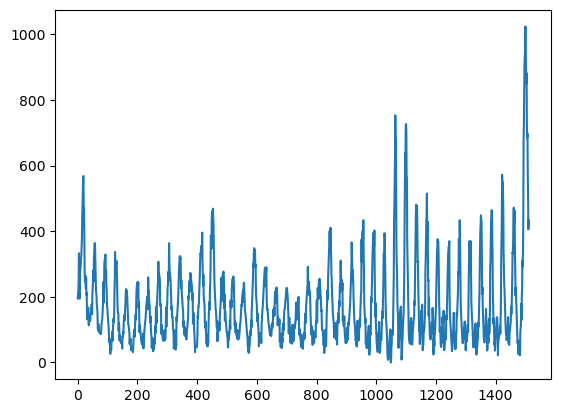

In [11]:
data = hp.enhance_peaks(data, iterations=2)

plt.plot(data)

In [12]:
working_data, measures = hp.process(data, freq, report_time=True)


Finished in 0.008698 sec


/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.9/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


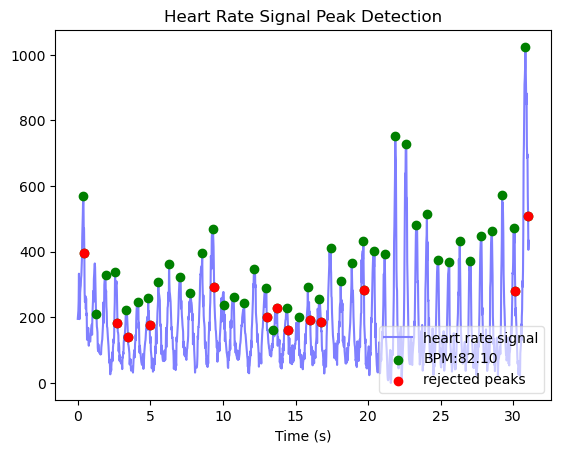

In [13]:
hp.plotter(working_data, measures)

/opt/homebrew/Caskroom/miniforge/base/envs/myenv/lib/python3.9/site-packages/heartpy/visualizeutils.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


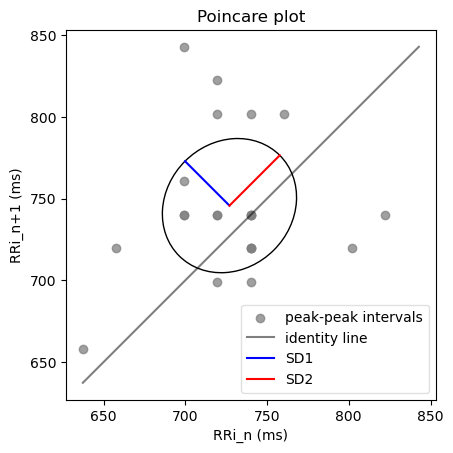

In [14]:
hp.plot_poincare(working_data, measures)

In [15]:
measures

{'bpm': 82.09521425263148,
 'ibi': 730.8586809379909,
 'sdnn': 49.35782911550629,
 'sdsd': 35.948512058620445,
 'rmssd': 57.481173444134434,
 'pnn20': 0.8636363636363636,
 'pnn50': 0.36363636363636365,
 'hr_mad': 20.557615661689397,
 'sd1': 38.43706701391017,
 'sd2': 43.50905998916248,
 's': 5253.875946379066,
 'sd1/sd2': 0.8834267397062664,
 'breathingrate': 0.3304848685142344}